In [1]:
import pandas as pd

df = pd.read_csv('reviews_1324169.csv') # 하나 불러와서 데이터 확인하기

In [2]:
df

,Review,Star
0,임산부라;; 울퉁불퉁 한데 M사이즈 편하게 잘 맞고 부드럽고 좋아요 주머니도 있어서...,5.0
1,허리가 살짝 큰데 끈으로 조이면 되고\n주머니가 있어서 편하고 좋아요~,5.0
2,요즘 살쪄서 편하게 입을 치마 찾다가 샀는데 편하고 조아여 옆트임때매 핏이 이상해보...,5.0
3,배송은 토요일에 시켰는데 화요일에 와서 빠르게 온 것 같구요 받자마자 입어봤는데 너...,5.0
4,살짝 큰감잇는데 여유잇어서 오히려좋아요 옆트임잇어서 활동성도좋고 포인트도되고 예쁘네용,5.0
...,...,...
1003,사이즈도 딱이고 재질도 너무 좋아요 여름에도 입을 수 있을것 같아요,5.0
1004,너무 마음에 듭니다 사이즈도 딱이고 재질도 너무 좋아요 여름에도 입을 수 있을것같아요,5.0
1005,색상도 좋구요\n원단과 핏도 원하던바라\n마음에 드네요,5.0
1006,편하고 좋아요 길이감도 적당하고 옆으로 트여서 활동성이 좋아요,5.0


In [5]:
df['Review'].duplicated().sum()

368

In [8]:
duplicate_reviews = df[df['Review'].duplicated()]
duplicate_reviews

,Review,Star
6,요즘 살쪄서 편하게 입을 치마 찾다가 샀는데 편하고 조아여 옆트임때매 핏이 이상해보...,5.0
7,배송은 토요일에 시켰는데 화요일에 와서 빠르게 온 것 같구요 받자마자 입어봤는데 너...,5.0
8,살짝 큰감잇는데 여유잇어서 오히려좋아요 옆트임잇어서 활동성도좋고 포인트도되고 예쁘네용,5.0
9,개미허리와 노덩이가 아니시면 정사이즈 추천 드립니다 재질 부드럽고 탄탄합니당,4.0
19,조금만 더 길었으면 싶지만... 그외에 모든것은 다 만족해요 질도 좋고 옆트임 있어...,5.0
...,...,...
994,너무좋아요~~슬릿이 과하지않아서 데일리로 딱이네요,5.0
995,핏이 예쁘고 슬릿이 옆쪽이라 더 편할거같아요\n부들부들 재질에 여름에 입기좋아요,5.0
996,딱 원하던 핏과 재질감입니다\n길이감도 좋고 긴치마 처음입어보는데 너무 마음에 들어요,5.0
997,예전에 구매하고 너무 마음에 들어서 재구매합니다!,5.0


In [10]:
summary_df = pd.read_csv('overall_summary_updated.csv')
summary_df

,Product ID,Title,Review Count,Brand Name
0,1875663,[쿨탠다드] 우먼즈 피케 폴로 원피스 [블랙],1002,무신사 스탠다드 우먼
1,3977452,GIRLFRIEND SLEEVELESS MINI DRESS (BLACK),227,글로니
2,1875664,[쿨탠다드] 우먼즈 피케 폴로 원피스 [네이비],1004,무신사 스탠다드 우먼
3,4018731,레이스 리본 마이크로 미니 쇼츠 팬츠 스커트 [화이트],401,플레이스 스튜디오
4,3977488,GIRLFRIEND SLEEVELESS MINI DRESS (WHITE),165,글로니
...,...,...,...,...
82,1324169,우먼즈 플랫 테리 스웨트 롱 스커트 [블랙],1008,무신사 스탠다드 우먼
83,2714524,Punching Knit Dress BLACK,1008,어반드레스
84,3035265,론아스 7992 스판데님 다크인디고 롱스커트,236,맥우드건
85,2392492,우먼즈 슬릿 넥 폴로 원피스 [에그렛],496,무신사 스탠다드 우먼


In [14]:
# 파일 전부 불러와서 하나로 합치기

file_list = [f"reviews_{product_id}.csv" for product_id in summary_df['Product ID'].tolist()]

df_list = []

for file in file_list:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
    except FileNotFoundError:
        print(f"파일 {file}을(를) 찾을 수 없습니다. 건너뜁니다.")

# 모든 데이터프레임을 하나로 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 결과를 새로운 CSV 파일로 저장하기 (예: merged_reviews.csv)
merged_df.to_csv('merged_reviews.csv', index=False)

# 완료 메시지 출력
print("모든 파일이 성공적으로 병합되었습니다.")

모든 파일이 성공적으로 병합되었습니다.


In [16]:
merged_df['Review'].duplicated().sum()

18468

In [17]:
merged_df.drop_duplicates(subset=['Review'], keep='first', inplace=True)

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26503 entries, 0 to 44968
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  26503 non-null  object 
 1   Star    26503 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.2+ KB


In [20]:
merged_df.tail(20)

,Review,Star
44927,편하고 이쁘고 코디하기도 좋네요 역시 믿고사는 로에일,5.0
44928,아주 편하고 재질탄탄하고 예뻐요~ 길이도 적당하구요 봄 여름에 아주 잘 입을 것 같습니다,5.0
44930,제 스팩이랑 비슷한 분들은 모델분이랑 같은 기장일 거예요,5.0
44931,요즘 흰색치마가 너무 이뻐보여서 그매했는데 완전 만족합니다 다들 이쁘다고 해줘요~!!,5.0
44938,친한 언니 생일선물 해줬는데 너무 마음에 들어했어용,5.0
44939,생각보다 볼륨이 많이 살지만 가격대비 괜찮고 길어요!,5.0
44942,"요즘같은 날씨에 너무 잘 어울리고, 길이도 적당하고 예뻐요",5.0
44943,질감이나 기장이나 딱 좋아요 잘입고 다닙니다 편해요,5.0
44944,생각보다 더 많이 펑퍼짐? 하긴 한데 그래도 예뻐요!0,5.0
44945,구김이 잘가는 소재이고\n앞모습은 이쁜데 뱃살 있으신 분들은 옆모습이 많이 부해보일...,4.0


In [40]:
import matplotlib.pyplot as plt

# 'Star' 컬럼의 값들로 원형 그래프 그리기
star_counts = merged_df['Star'].value_counts()

# 원형 그래프 그리기
plt.figure(figsize=(5, 5))
plt.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Star Ratings')
plt.show()

NameError: name 'merged_df' is not defined

In [24]:
star_counts

Star
5.0    22097
4.0     3595
3.0      683
2.0       76
1.0       52
Name: count, dtype: int64

In [25]:
merged_df.to_csv('merged_reviews.csv', index=False)

In [28]:
del merged_df

In [37]:
df = pd.read_csv('merged_reviews.csv')
df

,Review,Star
0,XS사려다 S샀는데 XS살걸ㅠㅜㅜ\n우선 다른 피케원피스보다 기장이 길었고\n시원한...,5.0
1,키가 매우매우 크기 때무네 저에게는 미니기장이긴 한데 짧을건 이미 예상하고 구매했습...,5.0
2,네이비랑 블랙 고밈하다가 블랙구매했어요 \n허리 잘록하게 잘들어가고 핏이뻐요 \n다...,5.0
3,처음에 s살까 xs살까 고민하다가 xs샀어요!!!\n질도 좋고 예뻐요 네이비도 살까...,5.0
4,많이 짧지도 않고 깔끔한 핏에 허리라인이 살짝 들어가서 예뻐요.\n옷감이 얇아서 밝...,5.0
...,...,...
26498,밴딩처리되어잇어서 편하고 이쁘네요!잘입겠습니다,5.0
26499,배송이 늦은게 다 용서되는 제품이예요 재질도 도톰하니 좋고 핀턱도 예쁘게 있어서 너...,5.0
26500,허리가 살짝 큰편이에요\n주름 잡는게 조금 애매해요\n면은 탄탄해요,3.0
26501,여자친구 선물 해줫는뎅 넘 맘에 들어해요 ㅎㅎ\n담에 또 구매할께요,5.0


In [38]:
# 전처리 코드 정의
def clean_review_column(df, column_name):
    # '\n'을 제거하고 한글 자모 및 구두점 제거
    df[column_name] = df[column_name].str.replace('\n', ' ', regex=False)  # 개행 문자 제거
    df[column_name] = df[column_name].str.replace(r'[ㄱ-ㅎㅏ-ㅣ]+', ' ', regex=True)  # 한글 자모 제거
    df[column_name] = df[column_name].str.replace(r'[^\w\s]', ' ', regex=True)  # 특정 구두점 제거
    
    # 여러 공백을 한 칸으로 변환
    df[column_name] = df[column_name].str.replace(r'\s+', ' ', regex=True)  # 여러 개의 공백을 한 칸으로 변환

    return df

In [39]:
df = clean_review_column(df, 'Review')
df

,Review,Star
0,XS사려다 S샀는데 XS살걸 우선 다른 피케원피스보다 기장이 길었고 시원한 재질이여...,5.0
1,키가 매우매우 크기 때무네 저에게는 미니기장이긴 한데 짧을건 이미 예상하고 구매했습...,5.0
2,네이비랑 블랙 고밈하다가 블랙구매했어요 허리 잘록하게 잘들어가고 핏이뻐요 다만 많이...,5.0
3,처음에 s살까 xs살까 고민하다가 xs샀어요 질도 좋고 예뻐요 네이비도 살까봐여,5.0
4,많이 짧지도 않고 깔끔한 핏에 허리라인이 살짝 들어가서 예뻐요 옷감이 얇아서 밝은데...,5.0
...,...,...
26498,밴딩처리되어잇어서 편하고 이쁘네요 잘입겠습니다,5.0
26499,배송이 늦은게 다 용서되는 제품이예요 재질도 도톰하니 좋고 핀턱도 예쁘게 있어서 너...,5.0
26500,허리가 살짝 큰편이에요 주름 잡는게 조금 애매해요 면은 탄탄해요,3.0
26501,여자친구 선물 해줫는뎅 넘 맘에 들어해요 담에 또 구매할께요,5.0


In [33]:
df['Review'] = df['Review'].str.replace('\n', ' ', regex=False)
df

,Review,Star
0,XS사려다 S샀는데 XS살걸ㅠㅜㅜ 우선 다른 피케원피스보다 기장이 길었고 시원한 재...,5.0
1,키가 매우매우 크기 때무네 저에게는 미니기장이긴 한데 짧을건 이미 예상하고 구매했습...,5.0
2,네이비랑 블랙 고밈하다가 블랙구매했어요 허리 잘록하게 잘들어가고 핏이뻐요 다만 ...,5.0
3,처음에 s살까 xs살까 고민하다가 xs샀어요!!! 질도 좋고 예뻐요 네이비도 살까봐...,5.0
4,많이 짧지도 않고 깔끔한 핏에 허리라인이 살짝 들어가서 예뻐요. 옷감이 얇아서 밝은...,5.0
...,...,...
26498,밴딩처리되어잇어서 편하고 이쁘네요!잘입겠습니다,5.0
26499,배송이 늦은게 다 용서되는 제품이예요 재질도 도톰하니 좋고 핀턱도 예쁘게 있어서 너...,5.0
26500,허리가 살짝 큰편이에요 주름 잡는게 조금 애매해요 면은 탄탄해요,3.0
26501,여자친구 선물 해줫는뎅 넘 맘에 들어해요 ㅎㅎ 담에 또 구매할께요,5.0


In [34]:
import re
df['Review'] = df['Review'].str.replace(r'[ㄱ-ㅎㅏ-ㅣ]+', ' ', regex=True)
df

,Review,Star
0,XS사려다 S샀는데 XS살걸 우선 다른 피케원피스보다 기장이 길었고 시원한 재질이...,5.0
1,키가 매우매우 크기 때무네 저에게는 미니기장이긴 한데 짧을건 이미 예상하고 구매했습...,5.0
2,네이비랑 블랙 고밈하다가 블랙구매했어요 허리 잘록하게 잘들어가고 핏이뻐요 다만 ...,5.0
3,처음에 s살까 xs살까 고민하다가 xs샀어요!!! 질도 좋고 예뻐요 네이비도 살까봐...,5.0
4,많이 짧지도 않고 깔끔한 핏에 허리라인이 살짝 들어가서 예뻐요. 옷감이 얇아서 밝은...,5.0
...,...,...
26498,밴딩처리되어잇어서 편하고 이쁘네요!잘입겠습니다,5.0
26499,배송이 늦은게 다 용서되는 제품이예요 재질도 도톰하니 좋고 핀턱도 예쁘게 있어서 너...,5.0
26500,허리가 살짝 큰편이에요 주름 잡는게 조금 애매해요 면은 탄탄해요,3.0
26501,여자친구 선물 해줫는뎅 넘 맘에 들어해요 담에 또 구매할께요,5.0


In [35]:
df['Review'] = df['Review'].str.replace(r'[^\w\s]', ' ', regex=True)
df

,Review,Star
0,XS사려다 S샀는데 XS살걸 우선 다른 피케원피스보다 기장이 길었고 시원한 재질이...,5.0
1,키가 매우매우 크기 때무네 저에게는 미니기장이긴 한데 짧을건 이미 예상하고 구매했습...,5.0
2,네이비랑 블랙 고밈하다가 블랙구매했어요 허리 잘록하게 잘들어가고 핏이뻐요 다만 ...,5.0
3,처음에 s살까 xs살까 고민하다가 xs샀어요 질도 좋고 예뻐요 네이비도 살까봐여,5.0
4,많이 짧지도 않고 깔끔한 핏에 허리라인이 살짝 들어가서 예뻐요 옷감이 얇아서 밝은데...,5.0
...,...,...
26498,밴딩처리되어잇어서 편하고 이쁘네요잘입겠습니다,5.0
26499,배송이 늦은게 다 용서되는 제품이예요 재질도 도톰하니 좋고 핀턱도 예쁘게 있어서 너...,5.0
26500,허리가 살짝 큰편이에요 주름 잡는게 조금 애매해요 면은 탄탄해요,3.0
26501,여자친구 선물 해줫는뎅 넘 맘에 들어해요 담에 또 구매할께요,5.0


In [36]:
df['Review'] = df['Review'].str.replace(r'\s+', ' ', regex=True)
df

,Review,Star
0,XS사려다 S샀는데 XS살걸 우선 다른 피케원피스보다 기장이 길었고 시원한 재질이여...,5.0
1,키가 매우매우 크기 때무네 저에게는 미니기장이긴 한데 짧을건 이미 예상하고 구매했습...,5.0
2,네이비랑 블랙 고밈하다가 블랙구매했어요 허리 잘록하게 잘들어가고 핏이뻐요 다만 많이...,5.0
3,처음에 s살까 xs살까 고민하다가 xs샀어요 질도 좋고 예뻐요 네이비도 살까봐여,5.0
4,많이 짧지도 않고 깔끔한 핏에 허리라인이 살짝 들어가서 예뻐요 옷감이 얇아서 밝은데...,5.0
...,...,...
26498,밴딩처리되어잇어서 편하고 이쁘네요잘입겠습니다,5.0
26499,배송이 늦은게 다 용서되는 제품이예요 재질도 도톰하니 좋고 핀턱도 예쁘게 있어서 너...,5.0
26500,허리가 살짝 큰편이에요 주름 잡는게 조금 애매해요 면은 탄탄해요,3.0
26501,여자친구 선물 해줫는뎅 넘 맘에 들어해요 담에 또 구매할께요,5.0


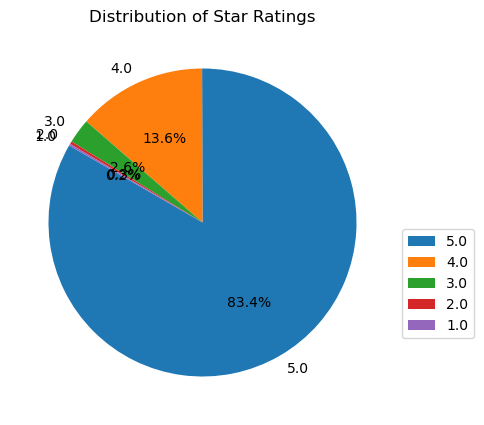

In [50]:
import matplotlib.pyplot as plt

# 'Star' 컬럼의 값들로 원형 그래프 그리기
star_counts = df['Star'].value_counts()

# 원형 그래프 그리기
plt.figure(figsize=(5, 5))
plt.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=150)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Star Ratings')
plt.show()

In [54]:
df_mj = pd.read_csv('combined_data.csv', encoding='cp949')
df_mj

,Star,Review
0,5,너모 예뻐요>< 그냥 제가 알던 재질인 줄 알았는데 좀 빳빳한 재질이에요 그리고 안...
1,4,기장에 비해 품은 작고 또 작은 사이즈로 가자니 입기 답답해서 m 사이즈에서 xl로...
2,5,안에 살짝 기모느낌이 나서 따뜻해요 봄이나 가을에 이것만 걸쳐도될듯 아래 밴딩이 잘...
3,5,화면보다 색은 어두워요. 그게더이쁜듯 입었을때 착감기는느낌은 아니지만 촤라락 떨어지...
4,5,??너무 예뻐서 사버림~ 약 2주 정도 입고 쓰는중~ ??사이즈 약간 힙-백수 st...
...,...,...
75742,5,배송 오래걸린다고 했는데 금방 왔어요 지금 입기 딱이네요
75743,4,입어보고싶은스타일이어서 구입했는데 재질도독특하고 괜찮아요
75744,5,일교차 클때 도착해서 잘입고있어요 만족합니다
75745,5,여기저기 입으면 힙하고 예뻐서 만족합니다 좋음


In [55]:
df_mj['Review'].duplicated().sum()

246

In [56]:
df_mj.drop_duplicates(subset=['Review'], keep='first', inplace=True)

In [57]:
df_mj['Review'].duplicated().sum()

0

In [ ]:
df_mj.to_csv('combined_data_utf8.csv', encoding='utf-8', index=False)

In [59]:
df.head(30)

,Review,Star
0,XS사려다 S샀는데 XS살걸 우선 다른 피케원피스보다 기장이 길었고 시원한 재질이여...,5.0
1,키가 매우매우 크기 때무네 저에게는 미니기장이긴 한데 짧을건 이미 예상하고 구매했습...,5.0
2,네이비랑 블랙 고밈하다가 블랙구매했어요 허리 잘록하게 잘들어가고 핏이뻐요 다만 많이...,5.0
3,처음에 s살까 xs살까 고민하다가 xs샀어요 질도 좋고 예뻐요 네이비도 살까봐여,5.0
4,많이 짧지도 않고 깔끔한 핏에 허리라인이 살짝 들어가서 예뻐요 옷감이 얇아서 밝은데...,5.0
5,통통한 편인데 엠사이즈 잘맞아요 딱 기본 스타일이라서 매우 맘에 듭니다,5.0
6,키가 있어서 M살지 L 살지 고민했는데 후기 보고 M 샀어요 제 체형이라면 M은 사...,4.0
7,소재가 얇고 시원해서 땀도 잘 흡수해줘요 근데 단점은 허벅지부분이 다 비쳐요 속바지...,3.0
8,77반 88에게 타이트하게 맞아요 이쁘고 핏하고 시원하지만 계속 숨참고 있어야 한다...,5.0
9,요즘 나오는 피케이 원피스들은 너무 달라붙거나 짧아서 입지를 못하는데 이건 제 키 ...,5.0
